# REGRESSION USING THE LINNURUD DATASET

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model, model_selection
from sklearn.model_selection import train_test_split

DATA ANALYSIS PROCESS

1. Getting data
2. Asking the right questions
3. Cleaning dataset
4. Modelling dataset
5. Visualization
6. Reporting

##### GET AND LOAD LINNURED DATASET

About the Linnerud Dataset

Data used inthe workis the scikit learn built-in dataset, the Linnured dataset. The data is collected from twenty middle aged men in a fitness club, consisting of the excersice (Chins, Situps, Jumps) and the accomapnying physiology (Weight, Waist, and Pulse).  The excersie variabale represents the data ehile the physiological variable represents the target (the datset has multiple targets)

In this article, I will describe the relationship that exist between the data and the targets, for eample the Chin and Weight. First, we will write a code that loads the datset from Skleearn and assign it to a variable name linnured and covert to dataframe using the pandas library. 

###### Load Data

In [3]:
from sklearn import datasets

# Load the Linnured dataset

linnerud = datasets.load_linnerud()

X = linnerud['data']
Y = linnerud['target']

##### PREPARE DATASET

Once I have loaded the dataset from sklearn, It is encessary to create a dataframe inorder to assign columns names to the variable X and Y. Moreover, having the dataset in dataframe helps manipulation easier. One the data and tragets dataframes has been created, I will go on to merge them together into one dataframe

###### Prepare Data

In [4]:
#Converting X to dataframe and Assigning a variable name and Column names to the data
data = pd.DataFrame(X, columns=['Weight', 'Waist', 'Pulse'])
#print(data)

#Converting Y to dataframe and Assigning a variable name - target - and Column names to the data
target = pd.DataFrame(Y, columns=['Chins', 'Sit_ups', 'Jumps'])
#print(target)

#Merge the two dataframes using merge function and assign to a variable name
linnerud_data = pd.merge(data, target, left_index=True, right_index=True)
print(linnerud_data)

    Weight  Waist  Pulse  Chins  Sit_ups  Jumps
0      5.0  162.0   60.0  191.0     36.0   50.0
1      2.0  110.0   60.0  189.0     37.0   52.0
2     12.0  101.0  101.0  193.0     38.0   58.0
3     12.0  105.0   37.0  162.0     35.0   62.0
4     13.0  155.0   58.0  189.0     35.0   46.0
5      4.0  101.0   42.0  182.0     36.0   56.0
6      8.0  101.0   38.0  211.0     38.0   56.0
7      6.0  125.0   40.0  167.0     34.0   60.0
8     15.0  200.0   40.0  176.0     31.0   74.0
9     17.0  251.0  250.0  154.0     33.0   56.0
10    17.0  120.0   38.0  169.0     34.0   50.0
11    13.0  210.0  115.0  166.0     33.0   52.0
12    14.0  215.0  105.0  154.0     34.0   64.0
13     1.0   50.0   50.0  247.0     46.0   50.0
14     6.0   70.0   31.0  193.0     36.0   46.0
15    12.0  210.0  120.0  202.0     37.0   62.0
16     4.0   60.0   25.0  176.0     37.0   54.0
17    11.0  230.0   80.0  157.0     32.0   52.0
18    15.0  225.0   73.0  156.0     33.0   54.0
19     2.0  110.0   43.0  138.0     33.0

###### Check for Null Values

In [5]:
linnerud_data.isnull().sum()

Weight     0
Waist      0
Pulse      0
Chins      0
Sit_ups    0
Jumps      0
dtype: int64

##### ANALYZING DATASET

First, I will check for the inter-relationship of the variables in the dataset. To do this, I will use the correlation function and go on to visualizing it using heatmap. 

Second, I will check for the statistics of the distribution of the data (univariate distribution). For this, I will plot a distribution plot for both the target and independent variable, data and then go on to check the maximum, minimum values and then the median.

###### Determine Correlation

In [6]:
print(data['Weight'].corr(linnerud_data['Chins']))
print(data['Waist'].corr(linnerud_data['Sit_ups']))
print(data['Pulse'].corr(linnerud_data['Jumps']))

-0.38969365080345586
-0.6455980279273231
0.03493306213305622


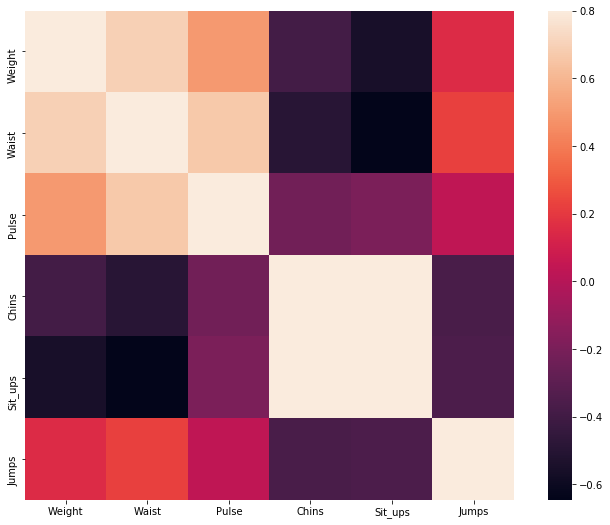

In [7]:
corr = linnerud_data.corr()
corr
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.8, square=True)

We can observe from the correlation result that among the correlation between the data and the target, the correlation for Waist and Situps is pretty high, -0.64.

<function matplotlib.pyplot.show(*args, **kw)>

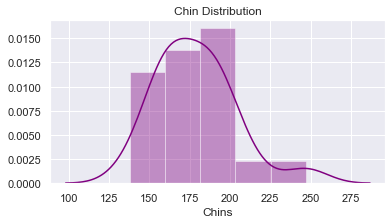

In [9]:
sns.set(rc={"figure.figsize": (6, 3)}); np.random.seed(0)
sns.distplot(linnerud_data['Chins'], color= 'purple')
plt.title('Chin Distribution')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

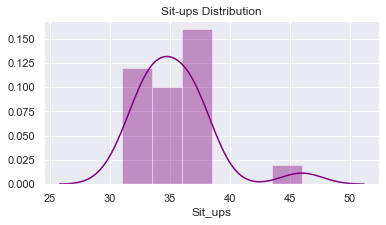

In [10]:
sns.set(rc={"figure.figsize": (6, 3)}); np.random.seed(0)
sns.distplot(linnerud_data['Sit_ups'], color= 'purple')
plt.title('Sit-ups Distribution')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

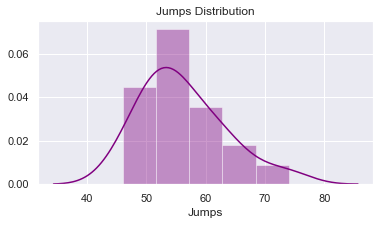

In [9]:
sns.set(rc={"figure.figsize": (6, 3)}); np.random.seed(0)
sns.distplot(linnerud_data['Jumps'], color= 'purple')
plt.title('Jumps Distribution')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

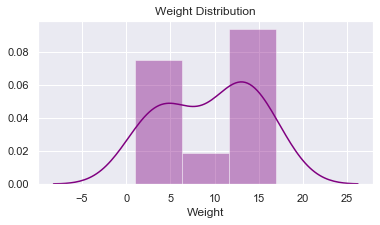

In [10]:
sns.set(rc={"figure.figsize": (6, 3)}); np.random.seed(0)
sns.distplot(linnerud_data['Weight'], color= 'purple')
plt.title('Weight Distribution')
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

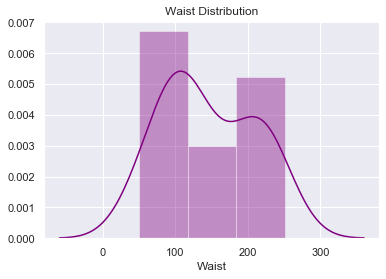

In [11]:
sns.set(rc={"figure.figsize": (6, 4)}); np.random.seed(0)
sns.distplot(linnerud_data['Waist'], color= 'purple')
plt.title('Waist Distribution')
plt.show

Text(0.5, 1.0, 'Pulse Distribution')

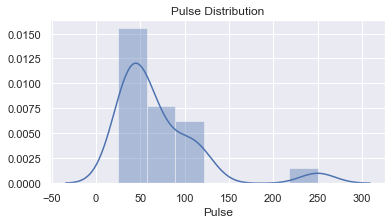

In [11]:
sns.distplot(linnerud_data['Pulse'])
plt.title('Pulse Distribution')

In [13]:
print('Max Chin: ', linnerud_data.Chins.max(), 'Min Chin: ', linnerud_data.Chins.min(), 'Median Chins', linnerud_data.Chins.median())

chin = linnerud_data.Chins.value_counts()
print('Highest Chin: ', chin.index[0], 'Lowest Chin: ', chin.index[-1])

print('===================================================')

print('Max Sit-ups: ', linnerud_data.Sit_ups.max(), 'Min Sit-ups: ', linnerud_data.Sit_ups.min(), 'Median Sit-ups', linnerud_data.Sit_ups.median())

sit_ups = linnerud_data.Sit_ups.value_counts()
print('Highest: ', sit_ups.index[0], 'Lowest: ', sit_ups.index[-1])

print('===================================================')
print('Max Jumps: ', linnerud_data.Jumps.max(), 'Min Chin: ', linnerud_data.Jumps.min(), 'Median Chins', linnerud_data.Jumps.median())

jumps = linnerud_data.Jumps.value_counts()
print('Highest Jumps: ', jumps.index[0], 'Lowest Jumps: ', jumps.index[-1])

print('===================================================')
print('Max Weight: ', linnerud_data.Weight.max(), 'Min Chin: ', linnerud_data.Weight.min(), 'Median Chins', linnerud_data.Weight.median())

weight = linnerud_data.Weight.value_counts()
print('Highest Weights: ', weight.index[0], 'Lowest Weights: ', weight.index[-1])

print('===================================================')
print('Max Waist: ', linnerud_data.Waist.max(), 'Min Chin: ', linnerud_data.Waist.min(), 'Median Chins', linnerud_data.Waist.median())

waist = linnerud_data.Waist.value_counts()
print('Highest Waist: ', waist.index[0], 'Lowest Waist: ', waist.index[-1])



print('===================================================')
print('Max Pulse: ', linnerud_data.Pulse.max(), 'Min Chin: ', linnerud_data.Pulse.min(), 'Median Chins', linnerud_data.Pulse.median())

pulse = linnerud_data.Pulse.value_counts()
print('Highest Pulse: ', pulse.index[0], 'Lowest Pulse: ', pulse.index[-1])

Max Chin:  247.0 Min Chin:  138.0 Median Chins 176.0
Highest Chin:  154.0 Lowest Chin:  191.0
Max Sit-ups:  46.0 Min Sit-ups:  31.0 Median Sit-ups 35.0
Highest:  33.0 Lowest:  31.0
Max Jumps:  74.0 Min Chin:  46.0 Median Chins 55.0
Highest Jumps:  56.0 Lowest Jumps:  58.0
Max Weight:  17.0 Min Chin:  1.0 Median Chins 11.5
Highest Weights:  12.0 Lowest Weights:  5.0
Max Waist:  251.0 Min Chin:  50.0 Median Chins 122.5
Highest Waist:  101.0 Lowest Waist:  162.0
Max Pulse:  250.0 Min Chin:  25.0 Median Chins 54.0
Highest Pulse:  60.0 Lowest Pulse:  115.0


After I have ploted the distribution of the datasetd fro bot the data and the traget, I noticed that the some of the dataframe are biased especialy for the independent Variables being Weight, Waist and Pulse variables. It is observed that the data points are populated on either sides in the plot. To solve this, I will normalize the data points, coverting them to numbers between 0 and 1 .

To normaliza, I will use the formular:

X = (X -Xmin()) / (X -Xmax())

###### Redefine variables

In [15]:
X = linnerud_data[['Weight', 'Waist', 'Pulse']]
y = linnerud_data[['Chins', 'Sit_ups', 'Jumps']]

###### Normalize Data

In [16]:
X = (X -X.min()) / (X.max() - X.min())
X

,Weight,Waist,Pulse
0,0.2500,0.557214,0.155556
1,0.0625,0.298507,0.155556
2,0.6875,0.253731,0.337778
3,0.6875,0.273632,0.053333
4,0.7500,0.522388,0.146667
5,0.1875,0.253731,0.075556
6,0.4375,0.253731,0.057778
7,0.3125,0.373134,0.066667
8,0.8750,0.746269,0.066667
9,1.0000,1.000000,1.000000


##### MODELING DATASET

After the X variable had been pre-processed, I split the X array up for training and validation purposes, using sklearn’s train_test_split().

I then defined the model. Because the target has multiple columns, I used sklearn’s MultiOutputRegressor() to separate the predictions into 3 separate columns.

I also selected sklearn’s Ridge() function, which is a type of linear regression, and achieved a mean_squared_error of 131.64

###### Splitting X for Testing and Validating

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_val.shape, y_val.shape


((16, 3), (4, 3), (4, 3))

In [18]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

model = MultiOutputRegressor(Ridge(random_state=1)).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.2508382384061478


###### Prediction on validation data set

In [37]:
y_pred = model.predict(X_val)
y_pred 

array([[183.70305459,  35.65171046,  56.09856434],
       [192.71099243,  37.45868631,  54.52505193],
       [185.94731813,  36.25224697,  55.53900758],
       [179.68255327,  34.73016568,  56.93174121]])

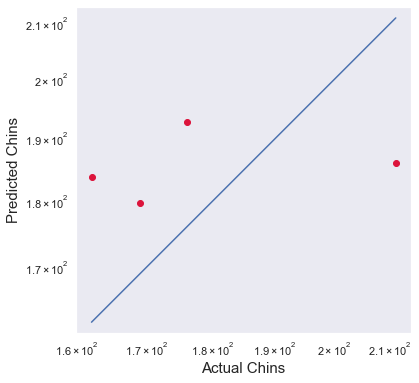

In [66]:

plt.figure(figsize=(6,6))
plt.scatter(y_val.iloc[:,0], y_pred[:,0], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred[:,0]), max(y_val.iloc[:,0]))
p2 = min(min(y_pred[:,0]), min(y_val.iloc[:,0]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Chins', fontsize=15)
plt.ylabel('Predicted Chins', fontsize=15)
plt.axis('equal')
plt.show()

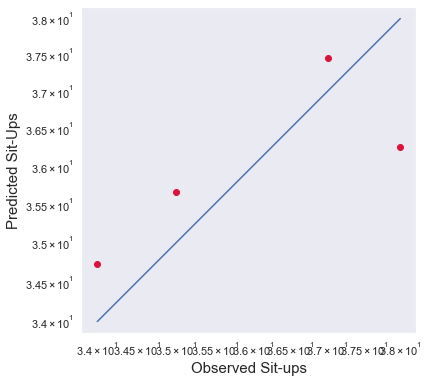

In [70]:
plt.figure(figsize=(6,6))
plt.scatter(y_val.iloc[:,1], y_pred[:,1], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred[:,1]), max(y_val.iloc[:,1]))
p2 = min(min(y_pred[:,1]), min(y_val.iloc[:,1]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed Sit-ups', fontsize=15)
plt.ylabel('Predicted Sit-Ups', fontsize=15)
plt.axis('equal')
plt.show()

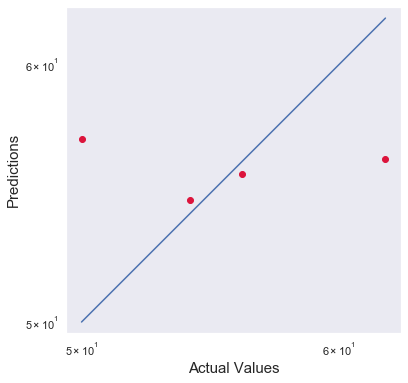

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(y_val.iloc[:,2], y_pred[:,2], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred[:,2]), max(y_val.iloc[:,2]))
p2 = min(min(y_pred[:,2]), min(y_val.iloc[:,2]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [71]:
# Importing libraries 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from regressormetricgraphplot import *
%matplotlib inline

In [72]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
#print(lr.score(X_train, y_train))

y_pred2 = lr.predict(X_val)
y_pred2


array([[195.59428258,  36.30172124,  55.96463554],
       [202.43406283,  38.65507737,  53.63007562],
       [193.37194559,  36.82554205,  55.27182846],
       [195.22868245,  35.2530569 ,  57.1366535 ]])

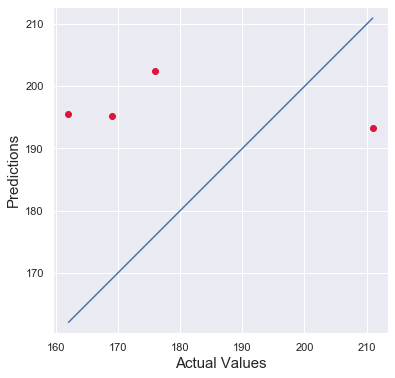

In [93]:
plt.figure(figsize=(6,6))
plt.scatter(y_val.iloc[:,0], y_pred2[:,0], c='crimson')


p1 = max(max(y_pred2[:,0]), max(y_val.iloc[:,0]))
p2 = min(min(y_pred2[:,0]), min(y_val.iloc[:,0]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()




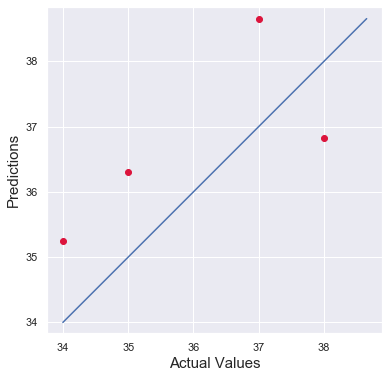

In [94]:
plt.figure(figsize=(6,6))
plt.scatter(y_val.iloc[:,1], y_pred2[:,1], c='crimson')


p1 = max(max(y_pred2[:,1]), max(y_val.iloc[:,1]))
p2 = min(min(y_pred2[:,1]), min(y_val.iloc[:,1]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()




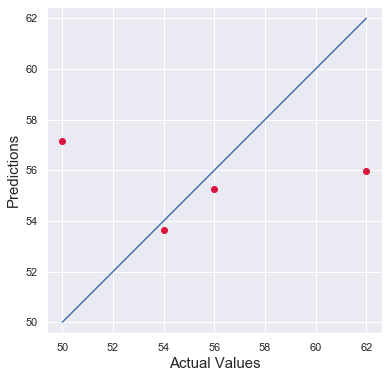

In [95]:
plt.figure(figsize=(6,6))
plt.scatter(y_val.iloc[:,2], y_pred2[:,2], c='crimson')


p1 = max(max(y_pred2[:,2]), max(y_val.iloc[:,2]))
p2 = min(min(y_pred2[:,2]), min(y_val.iloc[:,2]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()




Polynomial Regression

In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [97]:
# predict results for test data
y_pred3 = pipeline.predict(X_val)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_val.iloc[:,1], y_pred3[:,1]))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred3)*100:3.3}%)')

Mean error: 3.82 (4.57%)


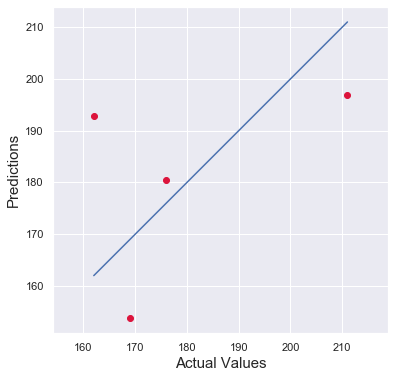

In [98]:
plt.figure(figsize=(6,6))
plt.scatter(y_val.iloc[:,0], y_pred3[:,0], c='crimson')


p1 = max(max(y_pred2[:,0]), max(y_val.iloc[:,0]))
p2 = min(min(y_pred2[:,0]), min(y_val.iloc[:,0]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

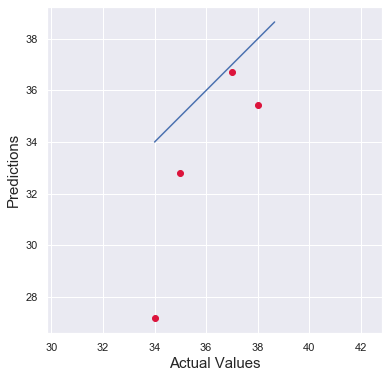

In [100]:
plt.figure(figsize=(6,6))
plt.scatter(y_val.iloc[:,1], y_pred3[:,1], c='crimson')


p1 = max(max(y_pred2[:,1]), max(y_val.iloc[:,1]))
p2 = min(min(y_pred2[:,1]), min(y_val.iloc[:,1]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

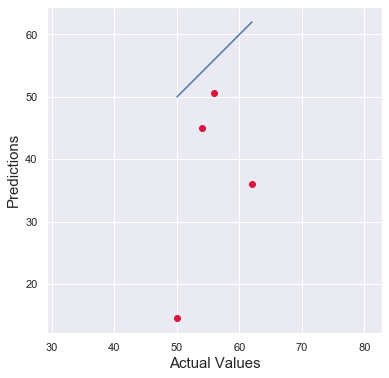

In [101]:
plt.figure(figsize=(6,6))
plt.scatter(y_val.iloc[:,2], y_pred3[:,2], c='crimson')


p1 = max(max(y_pred2[:,2]), max(y_val.iloc[:,2]))
p2 = min(min(y_pred2[:,2]), min(y_val.iloc[:,2]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
Conclusion

In [103]:
import pandas as pd
from CompareModels import *
%matplotlib inline

ModuleNotFoundError: No module named 'CompareModels'

In [102]:
# Metrics
print('Ridge Model: ', CompareModels.R2AndRMSE(y_test=y_val, y_pred=y_pred))
print('Polynomial Model: ', CompareModels.R2AndRMSE(y_test=y_val, y_pred=y_pred2))
print('Linear Model: ', CompareModels.R2AndRMSE(y_test=y_val, y_pred=y_pred3))

Ridge Model:  (0.13873299179515822, 11.47323237892222)
Polynomial Model:  (-0.30024876933581657, 15.602978808672495)
Linear Model:  (-10.343894024835768, 17.088016949895568)


In [ ]:
Based on analysis we observed that the polynomial model performed better than other models.